## Ratio Calculation Methods

Last notebook we explored band ratios. This notebook will go over the most cannonical way of calculating band ratios and add 2 more methods of calculating ratios.

In [1]:
# Set matplotlib for plotting in the notebook
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

from fooof import FOOOF
from fooof import FOOOFGroup
from fooof.utils import trim_spectrum
from fooof.synth import gen_group_power_spectra, param_sampler, gen_power_spectrum
# Import some utilities for synthesizing some test data

from utils.ratios import *
from utils.sims import *

In [2]:
theta_band = [4,8]
beta_band = [15,30]
n_trials = 100
freq_range = [1,50]
back_params = [0,1]

## Simulate Power Spectra

The following cell uses fooof to generate 100 PSD including oscillations from gen_sample(). Run 'gen_sample?' for more info

We will use these PSDs to demonstrate the different methods of calculating band ratios. Oscillations included are theta, alpha, and beta

In [3]:
#Gen group of PSDs regular PSD

freqs, powers, _ = gen_group_power_spectra(n_trials, freq_range, back_params, gen_sample(), nlvs=np.random.uniform(.005,.02)) 
fg = FOOOFGroup(peak_width_limits=[1,8], min_peak_amplitude=0.05, max_n_peaks=3)

fg.add_data(freqs,powers)
fg.fit()

Let's take a look at a PSD we created.

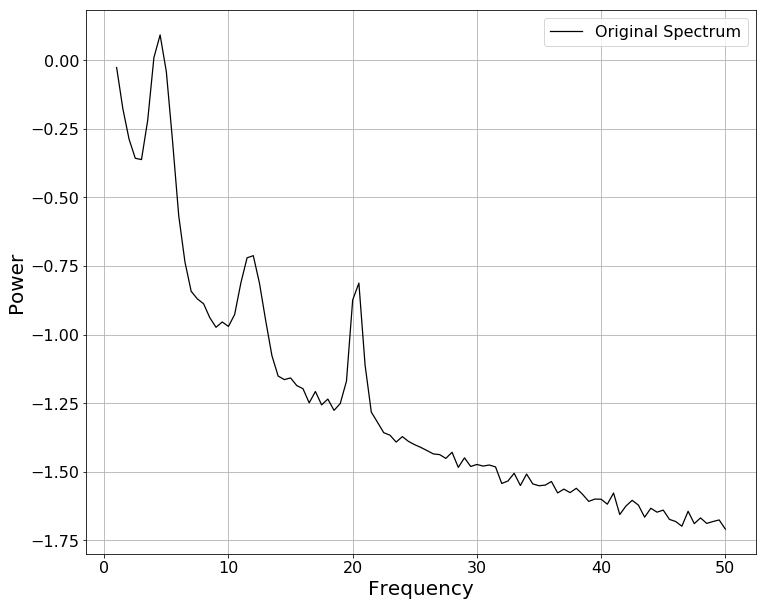

In [4]:
fg.get_fooof(0).plot()   

If all goes well, you should see our simulated PSD with two bumps around 4-12Hz and  one around 15-30 Hz

NOTE: The spikes here are greatly exaggerated for demonstration.

In [5]:
#Gather peak info from PSDs
peak = fg.get_all_data('peak_params')

# Calculate theta/beta ratios 

### Average Power Ratio

This is the most cannonical way of calculating band ratios according to current literature (2018). The idea here is that we we take average power in a frequency band and divide it by the average power in the other frequency band. Average power is calculated as the sum of all descrete power values divided by number on power values in that band.

In [6]:
calc_band_ratio?

In [7]:
ap_ratios = calc_group_band_ratio(fg, theta_band, beta_band)

Now lets take a look of the average of the cannonical way of calculating ratios over 100 trials

In [8]:
np.mean(ap_ratios)

0.36372234236374046

### Central Frequency power

This ratio calculation method finds the ratio of the maximum power in each band. Low_band_power/ high_band_power

In [9]:
calc_cf_power_ratio?

In [10]:
cf_ratios = calc_group_cf_power_ratio(fg,theta_band,beta_band)

In [11]:
np.mean(cf_ratios)

1.4741275584150384

### Density Ratio

This method is similar to the average power ratio except the average is calculated as the sum of all the power values divided by the bandwidth instead of number of samples.

In [12]:
calc_density_ratio?

In [13]:
d_ratios = calc_group_density_ratio(fg,theta_band,beta_band)

In [14]:
np.mean(d_ratios)

0.10559680907334404